# This Assignment is prepared and Submitted by Surendra Prakash Shukla



#### Context:



Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

#### Learning Outcomes:

 Exploratory Data Analysis
 Practicing statistics using Python
 Hypothesis testing

#### Data Attribute Information:

age: age of primary beneficiary
    
sex: insurance contractor gender, female, male
    
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
    
children: Number of children covered by health insurance / Number of dependents
    
smoker: Smoking
    
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
    
charges: Individual medical costs billed by health insurance.
    

#### Steps and tasks:

In [1]:
# 1 - Import All Librabries
import numpy as np
import pandas as pd
from scipy import stats
from scipy import special
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 2 - Read the data as a data frame
ins_df = pd.read_csv('insurance.csv')

Perform basic EDA which should include the following and print out your insights at every step.

In next few steps, basic EDA will be done. 

In [3]:
# 3 - shape of the Data 
rows, cols = ins_df.shape 
print ('Dataset has {} rows and {} columns'.format(rows,cols))

Dataset has 1338 rows and 7 columns


In [4]:
# 4 - Data type of each attribute - Output shows age, bmi, children, and charges are numerical. While other attributes are categorical. 
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
# Checking the presence of missing values
# Previous step already shows there are NO missing values in the dataset. 
# This can also be confirmed with below code.
ins_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# 5 point summary of numerical attributes
ins_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
# Calculating five number summary
def five_no_sum(data):
    quartiles = np.percentile(data,[25,50,75])
    data_min, data_max = data.min(), data.max()
    return quartiles, data_min, data_max

def print_five_sum(data):
    quart, minn, maxn = five_no_sum(data)
    print ('Minimum = {}, 25% = {}, 50% = {}, 75% = {}, Max = {}'.
           format(round(minn,2), round(quart[0],2),round(quart[1],2),round(quart[2],2),round(maxn,2)))





In [8]:
# Print five point summary for BMI
print_five_sum(ins_df['bmi'])

Minimum = 15.96, 25% = 26.3, 50% = 30.4, 75% = 34.69, Max = 53.13


In [9]:
# Print five point summary for Age
print_five_sum(ins_df['age'])

Minimum = 18, 25% = 27.0, 50% = 39.0, 75% = 51.0, Max = 64


In [10]:
# Print five point summary for Charges
print_five_sum(ins_df['charges'])

Minimum = 1121.87, 25% = 4740.29, 50% = 9382.03, 75% = 16639.91, Max = 63770.43


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


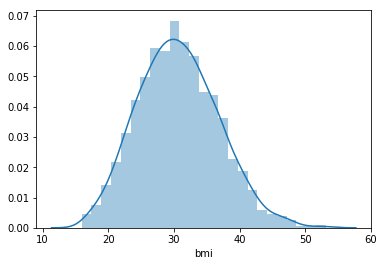

In [11]:
# Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
sns.distplot(ins_df['bmi'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


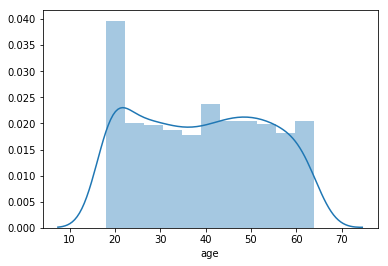

In [12]:
# distribution of age

sns.distplot(ins_df['age'])


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


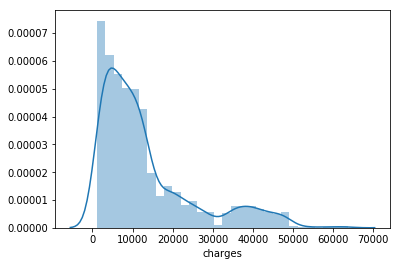

In [13]:
# distribution of charges

sns.distplot(ins_df['charges'])

In [14]:
# Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
ages, bmis, childrnes, chargess = ins_df.skew(axis=0)
print('Skewness for Age column is {}, BMI column is {} and Charges Column is {}'
      .format(round(ages,2),round(bmis,2),round(chargess,2)))

Skewness for Age column is 0.06, BMI column is 0.28 and Charges Column is 1.52


In [15]:
# Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

def find_outlier(data):
    """ This Function finds the outlier in a data set. 
    lower limit = Q1 - 1.5 * IQR, Upeer limit = Q3 + 1.5 IQR
    Return = The outliers in a List """
    iqr = stats.iqr(data)
    upper_lim = np.percentile(data,75) + (1.5 * iqr)
    lower_lim = np.percentile(data,25) - (1.5 * iqr)
    outlier = []
    for number in data:
        if (number > upper_lim) or (number < lower_lim):
            outlier.append(number)            
    return outlier    



In [16]:
# bmi outliers

bmi_outlier = find_outlier(ins_df['bmi'])
print ('There are total {} outliers in BMI column, there value is as follows = {}'.format(len(bmi_outlier),bmi_outlier))


There are total 9 outliers in BMI column, there value is as follows = [49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13]


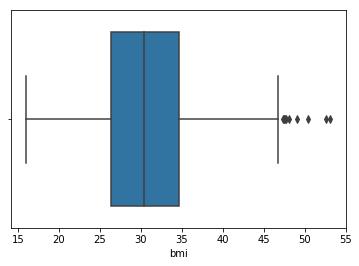

In [17]:
# confirm with boxplot

sns.boxplot(x=ins_df['bmi'])

In [18]:
# age outliers
age_outlier = find_outlier(ins_df['age'])
print ('There are total {} outliers in AGE column, there value is as follows = {}'.format(len(age_outlier),age_outlier))


There are total 0 outliers in AGE column, there value is as follows = []


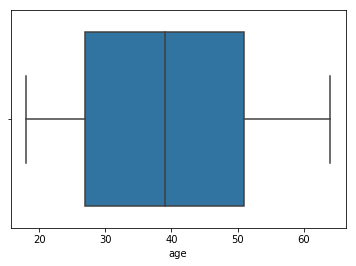

In [19]:
# Confirmation with box plot
sns.boxplot(x=ins_df['age'])

In [20]:
# Charges outlier
charges_outlier = find_outlier(ins_df['charges'])
print ('There are total {} outliers in CHARGES column, there value is as follows = {}'.format(len(charges_outlier),charges_outlier))


There are total 139 outliers in CHARGES column, there value is as follows = [39611.7577, 36837.467000000004, 37701.8768, 38711.0, 35585.576, 51194.55914, 39774.2763, 48173.361, 38709.176, 37742.5757, 47496.49445, 37165.1638, 39836.519, 43578.9394, 47291.055, 47055.5321, 39556.4945, 40720.55105, 36950.2567, 36149.4835, 48824.45, 43753.33705, 37133.8982, 34779.615, 38511.6283, 35160.13457, 47305.305, 44260.7499, 41097.16175, 43921.1837, 36219.40545, 46151.1245, 42856.837999999996, 48549.17835, 47896.79135, 42112.2356, 38746.3551, 42124.5153, 34838.873, 35491.64, 42760.5022, 47928.03, 48517.56315, 41919.097, 36085.219, 38126.2465, 42303.69215, 46889.2612, 46599.1084, 39125.33225, 37079.372, 35147.52848, 48885.135610000005, 36197.699, 38245.59327, 48675.5177, 63770.42801, 45863.205, 39983.42595, 45702.02235, 58571.074479999996, 43943.8761, 39241.442, 42969.8527, 40182.246, 34617.84065, 42983.4585, 42560.4304, 40003.33225, 45710.20785, 46200.9851, 46130.5265, 40103.89, 34806.4677, 40273.645

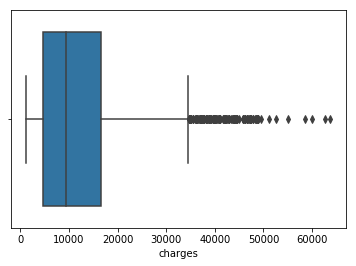

In [21]:
# Charges box plot
sns.boxplot(x=ins_df['charges'])

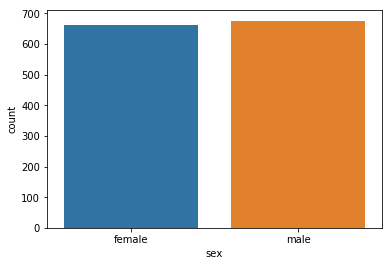

In [22]:
# Distribution of categorical columns (include children)
sns.countplot(x=ins_df['sex'])



In [23]:
male, female = ins_df['sex'].value_counts()
print ('There are {} males and {} females in the dataset'.format(male,female))

There are 676 males and 662 females in the dataset


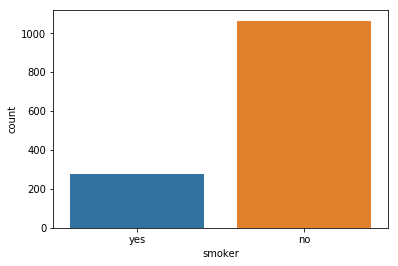

In [24]:
# Smoker distribution
sns.countplot(x=ins_df['smoker'])


In [25]:
nonsmoker, smoker = ins_df['smoker'].value_counts()
print ('There are {} nonsmokers and {} smokers in the dataset'.format(nonsmoker,smoker))

There are 1064 nonsmokers and 274 smokers in the dataset


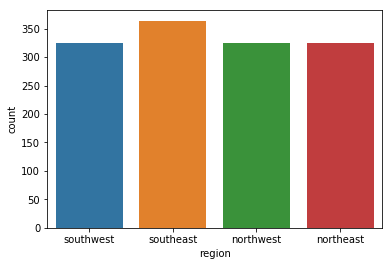

In [26]:
# Region
sns.countplot(ins_df['region'])

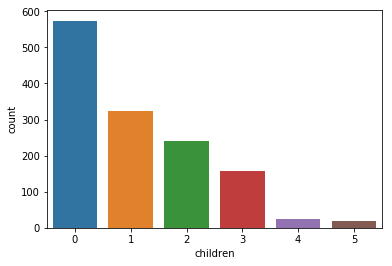

In [27]:
#Children distribution
sns.countplot(ins_df['children'])

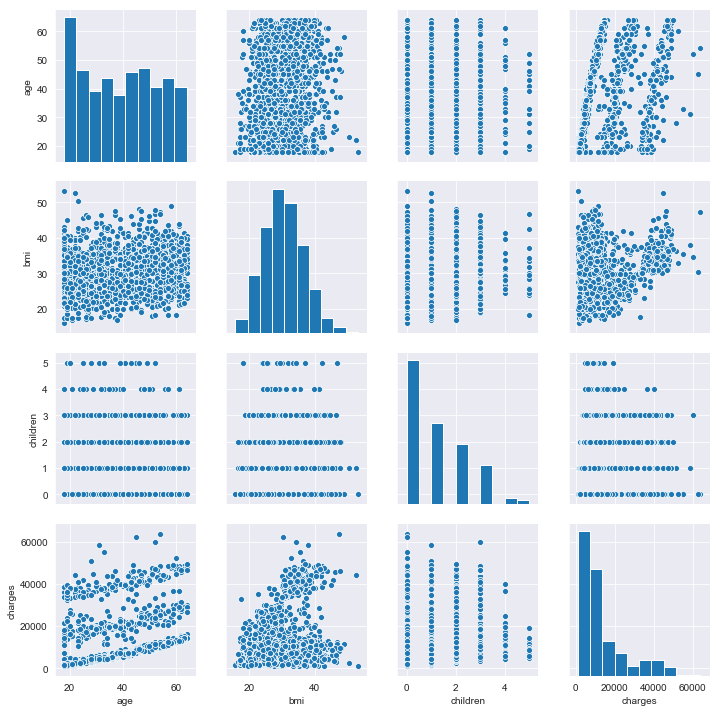

In [28]:
# pairplot
sns.set_style(style='darkgrid')
sns.pairplot(ins_df)

### Answer the following questions with statistical evidence

## 4 (a) Do charges of people who smoke differ significantly from the people who don't? 


##### Step 1 - State the null and alternate hypothesis
Ho = There is no difference between charges of people who smoke and who don't = mu1 = mu2

Ha = There is a significance difference between charges 

##### Step 2 - Decide a significance level
Here we select alpha = .05

##### Step 3 - Find a suitable statstics
I select t stats for two independent samples

##### Step 4 - Calculate tstats and pvalue

In [29]:
non_smoker = ins_df[ins_df['smoker']=='no']
smoker = ins_df[ins_df['smoker']=='yes']

print('Non Smoker Group - Mean = {}, STD = {}'
      .format(round(non_smoker['charges'].mean(),2),round(non_smoker['charges'].std(),2)))
print('    Smoker Group - Mean = {}, STD = {}'
      .format(round(smoker['charges'].mean(),2),round(smoker['charges'].std(),2)))


Non Smoker Group - Mean = 8434.27, STD = 5993.78
    Smoker Group - Mean = 32050.23, STD = 11541.55


In [42]:
tstats, pvalue = stats.ttest_ind(non_smoker['charges'],smoker['charges'])

if pvalue < .05:
    print ('Since pvalue {} is less than significance level of .05, so we reject the null hypothesis'
           .format(pvalue))
else:
    print ('Since pvalue {} is more than significance level of .05, so we fail to reject the null hypothesis'
           .format(pvalue))
    


Since pvalue 8.271435842177219e-283 is less than significance level of .05, so we reject the null hypothesis


##### We reject the null hypothesis, i.e. there is enough evidence to say that there are significant differences for charges of smokers and non-smokers. 

## 4(b) Does bmi of males differ significantly from that of females?

##### Step 1 - State the null and alternate hypothesis

Ho = There is no difference between bmi of males and females = mu1 = mu2

Ha = There is a significance difference between bmi of males with females

##### Step 2 - Decide a significance level

Here we select alpha = .05

##### Step 3 - Find a suitable statstics

I select t stats for two independent samples

##### Step 4 - Calculate tstats and pvalue

In [31]:
male_bmi = ins_df[ins_df['sex']=='male']
female_bmi = ins_df[ins_df['sex']=='female']
print('Male BMI - Mean = {}, STD = {}'
      .format(round(male_bmi['bmi'].mean(),2),round(male_bmi['bmi'].std(),2)))
print('FeMale BMI - Mean = {}, STD = {}'
      .format(round(female_bmi['bmi'].mean(),2),round(female_bmi['bmi'].std(),2)))



Male BMI - Mean = 30.94, STD = 6.14
FeMale BMI - Mean = 30.38, STD = 6.05


In [32]:
tstats, pvalue = stats.ttest_ind(male_bmi['bmi'],female_bmi['bmi'])

if pvalue < .05:
    print ('Since pvalue {} is less than significance level of .05, so we reject the null hypothesis'
           .format(round(pvalue,5)))
else:
    print ('Since pvalue {} is more than significance level of .05, so we fail to reject the null hypothesis'
           .format(round(pvalue,5)))
           
    



Since pvalue 0.08998 is more than significance level of .05, so we fail to reject the null hypothesis


##### We fail to reject null hypothesis, which means we do not have enough evidence to say bmi of males differs significantly from females

## 4 (c)Is the proportion of smokers significantly different in different genders?

##### Step 1 - State the Null and Alternate Hypothesis

Ho = There is no significance difference between the proportion of smokers in genders = mu1 = mu2

Ha = There is a significance difference between the proportions of smokers in genders = mu1 not equal to mu2

##### Step 2 - Decide the significance level

Here we select alpha = .05 

##### Step 3 - Select an appropriate statstics 

Here I am selecting test of propotion. 

##### Step 4 - Calculate Zscore and pvalue for proportions 

In [33]:
# Calculate the z score of propotion by using below method - 
# Step 1 - Calculate the Propotion of both male smokers and female smokers (p_male and p_female
# Step 2 - Calculate the propotion of pooled population i.e. total male smoker + total femal smoker/total males and females (p)
# step 3 - Calculate standard error by Bernoulli Distribution - sqrt[((p)*(1-p)/n1) + p*(1-p)/n2]
# step 4 - Calculate Z score = (p_male - p_female) - 0/Standard Error

total_males = len(ins_df[ins_df['sex'] == 'male'])
total_females = len(ins_df[ins_df['sex'] == 'female'])

total_male_smokers = len(ins_df[(ins_df['sex']=='male')&(ins_df['smoker']=='yes')])
total_female_smokers = len(ins_df[(ins_df['sex']=='female')&(ins_df['smoker']=='yes')])

prop_male_smokers = total_male_smokers / total_males
prop_female_smokers = total_female_smokers / total_females

prop_pooled = (total_female_smokers + total_male_smokers) / (total_females + total_males)

stad_err = np.sqrt((prop_pooled * (1-prop_pooled)/total_males) + (prop_pooled * (1-prop_pooled)/total_females))

z_score = (prop_female_smokers - prop_male_smokers)/stad_err

z_critical = stats.norm.ppf(.975)
p_value = stats.norm.cdf(z_score) * 2




In [34]:
# Alternate Method - using inbuilt function
from statsmodels.stats.proportion import proportions_ztest
zscore, pvalue = proportions_ztest([total_male_smokers, total_female_smokers],[total_males,total_females])
print (zscore,pvalue)

2.7867402154855503 0.005324114164320532


In [35]:
print ('Total Female Population is = {}, Of which {} are smoker. THis comes to {} % females are smoker.'
                       .format(total_females, total_female_smokers, round(prop_female_smokers,2)*100))
print ('Total male Population is = {}, Of which {} are smoker. THis comes to {} % males are smoker.'
                       .format(total_males, total_male_smokers, round(prop_male_smokers,2)*100))
print('Z Score = {}, while Z_critical = {} @ 95% confidence and p value = {}'.format(abs(z_score),z_critical,p_value))

if p_value < .05:
    print ('Since pvalue is less than significance level of {}, We Reject the null hypothesis'.format(.05))
else:
    print ('Since pvalue is more than significance level of {}, we fail to reject the null hypothesis'.format(.05))
    




Total Female Population is = 662, Of which 115 are smoker. THis comes to 17.0 % females are smoker.
Total male Population is = 676, Of which 159 are smoker. THis comes to 24.0 % males are smoker.
Z Score = 2.7867402154855503, while Z_critical = 1.959963984540054 @ 95% confidence and p value = 0.005324114164320532
Since pvalue is less than significance level of 0.05, We Reject the null hypothesis


##### We are rejecting the null hypothesis, i.e. there is enough evidence to support alternate hypothesis. So we can say with confidence that there is significant difference between proportions of smokers in genders

## 4 d. Is the distribution of bmi across women with no children, one child and two children, the same?

##### Step 1 - State the Null and Alternate Hypothesis
Ho = There is no significance difference between bmi across women with no children, one children and two children
( mu0 = mu1 = mu2)

Ha = There is significance difference between bmi across women with no children, one children and two children

##### Step 2 - Decide the significance level
Here we select alpha = .05



##### Step 3 - Select an appropriate statstics
Since we are working with more than 2 sample size, we need to run a ANOVA test. We will try to see if variance in BMI is coming due to childrens.

##### Step 4 - Run ANOVA test to calculate F Stat and pvalue

In [36]:
#Seperate the data for women with 0, 1 and 2 children
no_child_df = ins_df[(ins_df['children'] == 0) & (ins_df['sex']=='female')]
one_child_df = ins_df[(ins_df['children'] == 1) & (ins_df['sex']=='female')]
two_child_df = ins_df[(ins_df['children'] == 2) & (ins_df['sex']=='female')]

In [37]:
print ('For no children group - there are {} data elements with mean BMI = {} and BMI Standard Deviation = {}'
                         .format(len(no_child_df['bmi']),no_child_df['bmi'].mean(),no_child_df['bmi'].std()))
print ('For one children group - there are {} data elements with mean BMI = {} and BMI Standard Deviation = {}'
                         .format(len(one_child_df['bmi']),one_child_df['bmi'].mean(),one_child_df['bmi'].std()))
print ('For two children group - there are {} data elements with mean BMI = {} and BMI Standard Deviation = {}'
                         .format(len(two_child_df['bmi']),two_child_df['bmi'].mean(),two_child_df['bmi'].std()))


For no children group - there are 289 data elements with mean BMI = 30.361522491349486 and BMI Standard Deviation = 5.966934229366254
For one children group - there are 158 data elements with mean BMI = 30.05265822784811 and BMI Standard Deviation = 5.786831048981313
For two children group - there are 119 data elements with mean BMI = 30.64978991596637 and BMI Standard Deviation = 6.628199943377461


##### Looking at BMI mean and Standard deviation, it does not look like there is significant variance. We will try to prove this observation with ANOVA.

In [38]:
# Creating a new data frame with only data for women with 0, 1 and 2 children. Dropping other columns as they are not needed.
child_bmi_df = pd.DataFrame()
child_bmi_df = child_bmi_df.append(no_child_df)
child_bmi_df = child_bmi_df.append(one_child_df)
child_bmi_df = child_bmi_df.append(two_child_df)

child_bmi_df.drop(['age','sex','smoker','region','charges'],axis=1,inplace=True)




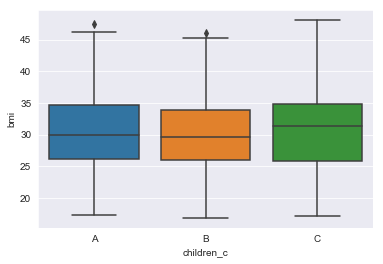

In [39]:
# This step is converting the children column to a true categorical column by using 'A' = 0 Child, B = 1 Child and C = 2 children
# this step is needed as "sm.stats.anova_lm" could not correctly calculate the degree of freedom, assuming 'children' as
# continous data.

def convert_child_categorical(data):
    if data == 0:
        return 'A'
    if data == 1:
        return 'B'
    if data == 2:
        return 'C'
    return 'other'

child_bmi_df['children_c'] = child_bmi_df['children'].apply(lambda x: convert_child_categorical(x))

# Observe the distribution on a boxplot, again does not look like there are significance differences, 
# but we will prove with ANOVA

sns.boxplot(x='children_c',y='bmi',data=child_bmi_df)

   

In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('bmi ~ children_c',data = child_bmi_df).fit()

aov_table = sm.stats.anova_lm(mod,typ=2)

fstats, pvalue = aov_table.iloc[0,2], aov_table.iloc[0,3]

aov_table

,sum_sq,df,F,PR(>F)
children_c,24.590123,2.0,0.334472,0.715858
Residual,20695.661583,563.0,NaN,NaN


In [41]:
print ('For Women BMI with 0, 1 and 2 children, ANOVA has given F stats = {} and pvalue = {}'
                      .format(fstats,pvalue))

if pvalue < .05:
    print ('Since pvalue is less than significance level, so we reject the null hypothesis')
else:
    print ('pvalue is greater than significance level, so we fail to reject the null hypothesis')


For Women BMI with 0, 1 and 2 children, ANOVA has given F stats = 0.33447201477576366 and pvalue = 0.7158579926754841
pvalue is greater than significance level, so we fail to reject the null hypothesis


##### We fail to reject null hypothesis, this infers that we do not have enough evidence to say with confidence that there are significant difference of BMI for women with 0, 1, and 2 children. 